# An average solution

## Setting up the problem

We want a function to create the initial vector,

In [1]:
import numpy as np

def initial_x(n):
    assert n >= 2
    x = 0.5 * np.ones(n)
    x[0] = 0.0
    x[-1] = 1.0
    return x

and another function to do the iteration:

In [2]:
def step(x):
    nx = x.copy()
    nx[1:-1] = 0.5 * (nx[2:] + nx[:-2])
    return nx

Checking some iterations,

In [3]:
x = initial_x(6)
print x
for i in range(10):
    x = step(x)
    print x

[ 0.   0.5  0.5  0.5  0.5  1. ]
[ 0.    0.25  0.5   0.5   0.75  1.  ]
[ 0.     0.25   0.375  0.625  0.75   1.   ]
[ 0.      0.1875  0.4375  0.5625  0.8125  1.    ]
[ 0.       0.21875  0.375    0.625    0.78125  1.     ]
[ 0.        0.1875    0.421875  0.578125  0.8125    1.      ]
[ 0.         0.2109375  0.3828125  0.6171875  0.7890625  1.       ]
[ 0.          0.19140625  0.4140625   0.5859375   0.80859375  1.        ]
[ 0.          0.20703125  0.38867188  0.61132812  0.79296875  1.        ]
[ 0.          0.19433594  0.40917969  0.59082031  0.80566406  1.        ]
[ 0.          0.20458984  0.39257812  0.60742188  0.79541016  1.        ]


it seems to converge to a linear function interpolating between 0 and 1.

## Plotting some values

We will plot the convergence with a somewhat greater number of points, $N = 20$, and steps, $S = 100$:

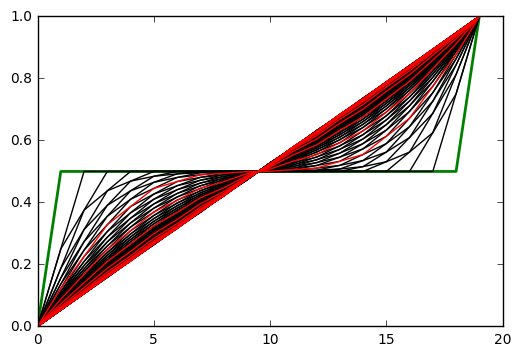

In [20]:
import matplotlib.pyplot as plt

def run_hist(x0, s):
    xh = [x0]
    for i in range(s):
        xh.append(step(xh[-1]))
    return xh

def plot_hist(xh):
    plt.clf()
    plt.plot(xh[0], 'g', linewidth=2)
    for i in range(1, len(xh)):
        if i % 10 != 0:
            plt.plot(xh[i], 'k')
    for i in range(1, len(xh)):
        if i % 10 == 0:
            plt.plot(xh[i], 'r')
    plt.show()

xh = run_hist(initial_x(20), 100)
plot_hist(xh)

Now plotting a single point convergence:

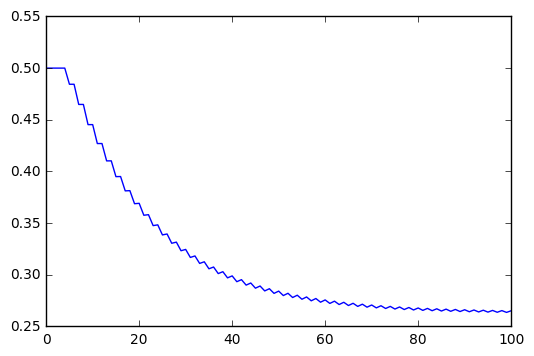

In [8]:
plt.clf()
plt.plot([x[5] for x in xh])
plt.show()

It seems to be an exponential relaxation to

In [9]:
5/19.

0.2631578947368421

Doing a semilog plot: 

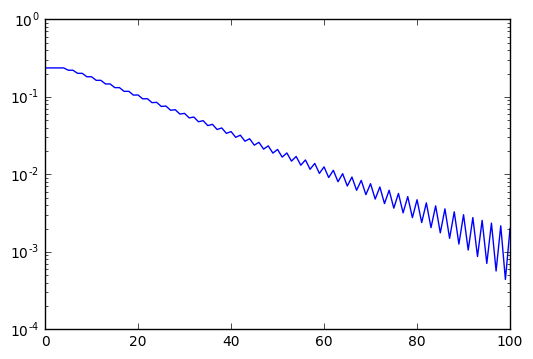

In [13]:
plt.clf()
plt.semilogy([x[5] - 5./19 for x in xh])
plt.show()

It seems to be exponential, although with increasing oscillations in the relative scale.

## Applying linearity

As all of the operations are linear, we could get some insight by analyzing what happens when both boundaries are set to 0 and we have a single nonzero value, set to 1.

In [16]:
def another_initial_x(n):
    x = np.zeros(n)
    x[n // 2] = 1.0
    return x
x = another_initial_x(10)
print x
for i in range(10):
    x = step(x)
    print x, np.sum(x)

[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
[ 0.   0.   0.   0.   0.5  0.   0.5  0.   0.   0. ] 1.0
[ 0.    0.    0.    0.25  0.    0.5   0.    0.25  0.    0.  ] 1.0
[ 0.     0.     0.125  0.     0.375  0.     0.375  0.     0.125  0.   ] 1.0
[ 0.      0.0625  0.      0.25    0.      0.375   0.      0.25    0.      0.    ] 0.9375
[ 0.       0.       0.15625  0.       0.3125   0.       0.3125   0.       0.125
  0.     ] 0.90625
[ 0.        0.078125  0.        0.234375  0.        0.3125    0.        0.21875
  0.        0.      ] 0.84375
[ 0.         0.         0.15625    0.         0.2734375  0.         0.265625
  0.         0.109375   0.       ] 0.8046875
[ 0.          0.078125    0.          0.21484375  0.          0.26953125
  0.          0.1875      0.          0.        ] 0.75
[ 0.          0.          0.14648438  0.          0.2421875   0.
  0.22851562  0.          0.09375     0.        ] 0.7109375
[ 0.          0.07324219  0.          0.19433594  0.          0.23535156
  0.          

[(0, 1.0), (1, 1.0), (2, 1.0), (3, 1.0), (4, 1.0), (5, 1.0), (6, 1.0), (7, 1.0), (8, 1.0), (9, 0.998046875), (10, 0.9970703125), (11, 0.99267578125), (12, 0.990234375), (13, 0.983642578125), (14, 0.97967529296875), (15, 0.971343994140625), (16, 0.96600341796875), (17, 0.956390380859375), (18, 0.9499053955078125), (19, 0.93939971923828125)]


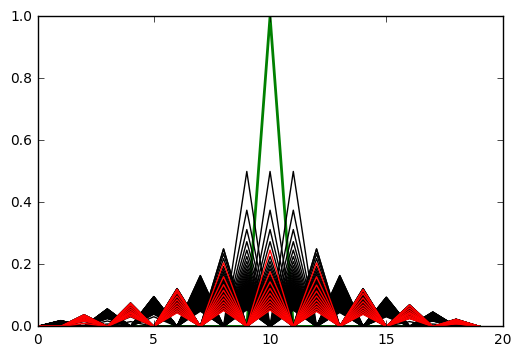

In [24]:
xh = run_hist(another_initial_x(20), 100)
print [(i, np.sum(x)) for i, x in enumerate(xh)][:20]
plot_hist(xh)

From these results we can conclude:

  * The elements sum to 1 before the perturbation hits the boundaries.
  * At each timestep only elements with even or odd indices are populated.
  
If we plot the nonzero values for step 8 (the last one where the perturbation hasn't hit the boundary) we see:

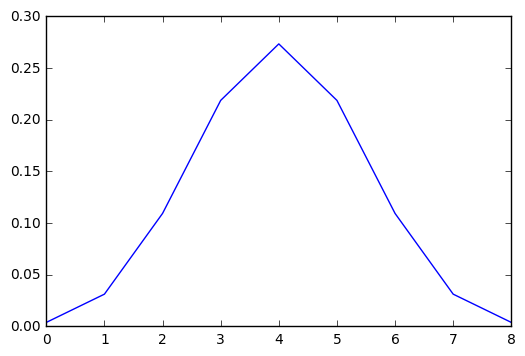

In [28]:
plt.clf()
plt.plot([xi for xi in xh[8] if xi != 0.0])
plt.show()

It looks quite similar to a normal or binomial distribution and that is not a coincidence, as the averaging steps could be considered a normalized version of the Pascal triangle construction process. So, our prediction for the nonzero values in the step $s$ while the perturbation hasn't hit the edge, would be the normalized binomial coefficients,

In [45]:
from scipy.special import binom as binomial
print [binomial(8, i) / 2 ** 8 for i in range(8+1)]
print [xi for xi in xh[8] if xi != 0.0]

[0.00390625, 0.03125, 0.109375, 0.21875, 0.2734375, 0.21875, 0.109375, 0.03125, 0.00390625]
[0.00390625, 0.03125, 0.109375, 0.21875, 0.2734375, 0.21875, 0.109375, 0.03125, 0.00390625]


and we see perfect agreement.

But if we try to continue after it hits the boundaries, we will end up with a messy problem involving reflections.

## Plotting convergence

Going to our original problem and plotting the differences from the linear "steady state" solution, we see:

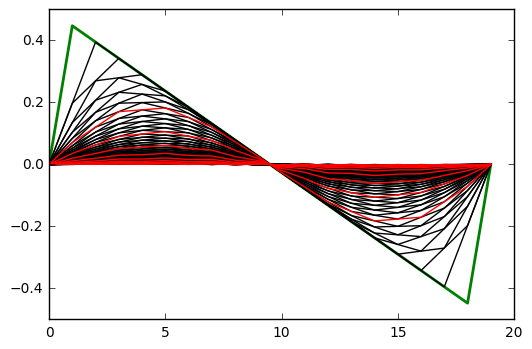

In [47]:
def steady_state_x(n):
    return np.linspace(0.0, 1.0, n)
xh = run_hist(initial_x(20), 100)
dxh = [x - steady_state_x(20) for x in xh]
plot_hist(dxh)

The later stage differences look quite close to trigonometrical functions. Checking for step 80:

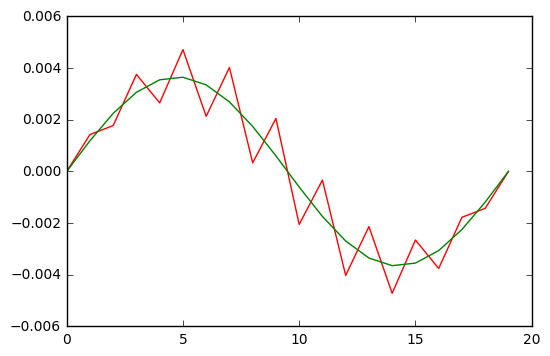

In [63]:
from scipy.optimize import curve_fit
idx = range(20)
def scaled_sin(i, a):
    return a * np.sin(2.0 * np.pi * i / 19)
popt, pcov = curve_fit(scaled_sin, idx, dxh[80])
plt.clf()
plt.plot(idx, dxh[80], 'r', np.vectorize(scaled_sin)(idx, *popt), 'g')
plt.show()

## Fourier

To avoid reflections, we are trying to find eigenvectors of the step operator. The analysis of the previous section suggests that trigonometric functions could provide those eigenvectors. Checking with sines: 

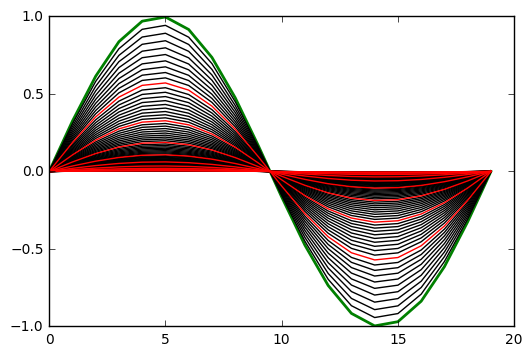

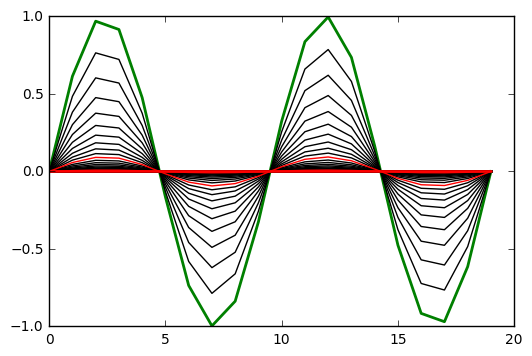

In [72]:
def initial_sine_x(n, k):
    return np.sin(np.linspace(0, 2.0 * np.pi * k, n))
xh = run_hist(initial_sine_x(20, 1), 100)
plot_hist(xh)
xh = run_hist(initial_sine_x(20, 2), 100)
plot_hist(xh)

They clearly seem to be eigenvectors, decaying faster with frequency. We can analyze the effect of the averaging operation in complex exponentials, to avoid the messiness of dealing with trigonometric addition formulas:

$x_i^0 = e^\frac{j k 2\pi i}{N}$

$x_i^{s+1} = \frac{x_{i-1}^s + x_{i+1}^s}{2}$

$x_i^1 = \frac{e^\frac{j 2\pi (i - k)}{N} + e^\frac{j 2\pi (i + k)}{N}}{2}$

$ = e^\frac{j 2\pi i}{N} \cos \frac{2\pi k}{N}$

Reproducing the last plot analytically:

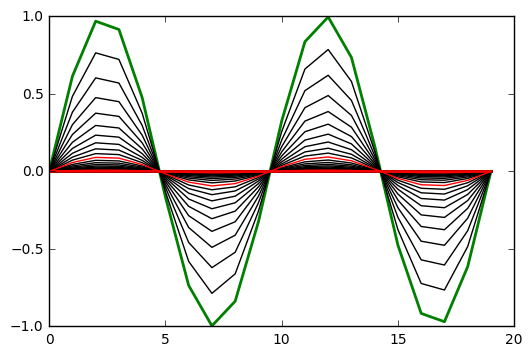

In [75]:
axh = [[np.cos(2.0 * np.pi * 2 / 19.0) ** s * np.sin(2.0 * np.pi * i * 2 / 19.0)
        for i in range(20)]
       for s in range(100)]
plot_hist(axh)

We get an excellent match.